In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
# import statsmodels.api as sm
# import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
# import statsmodels.api as sm
import scipy.stats as stats
# import statsmodels.stats.diagnostic as diag
from sklearn.naive_bayes import GaussianNB
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import root_mean_squared_error
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
random.seed(123)

In [3]:
houses_df = pd.read_csv('train.csv')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Calculamos la cantidad de null values que tengan nuestros datos y en que variables

In [4]:
null_counts = houses_df.isnull().sum()
# print(null_counts)
null_counts = null_counts[null_counts > 0]
print(null_counts)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Reemplazamos los valores de las variables categoricas a números y rellenamos los null values con ceros

In [5]:
for i in null_counts.index:
    print(i)
    houses_df = houses_df.apply(pd.to_numeric, errors='coerce')
    houses_df = houses_df.fillna(0)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


Verificamos si hay valores atípicos en nuestro dataset

<Axes: >

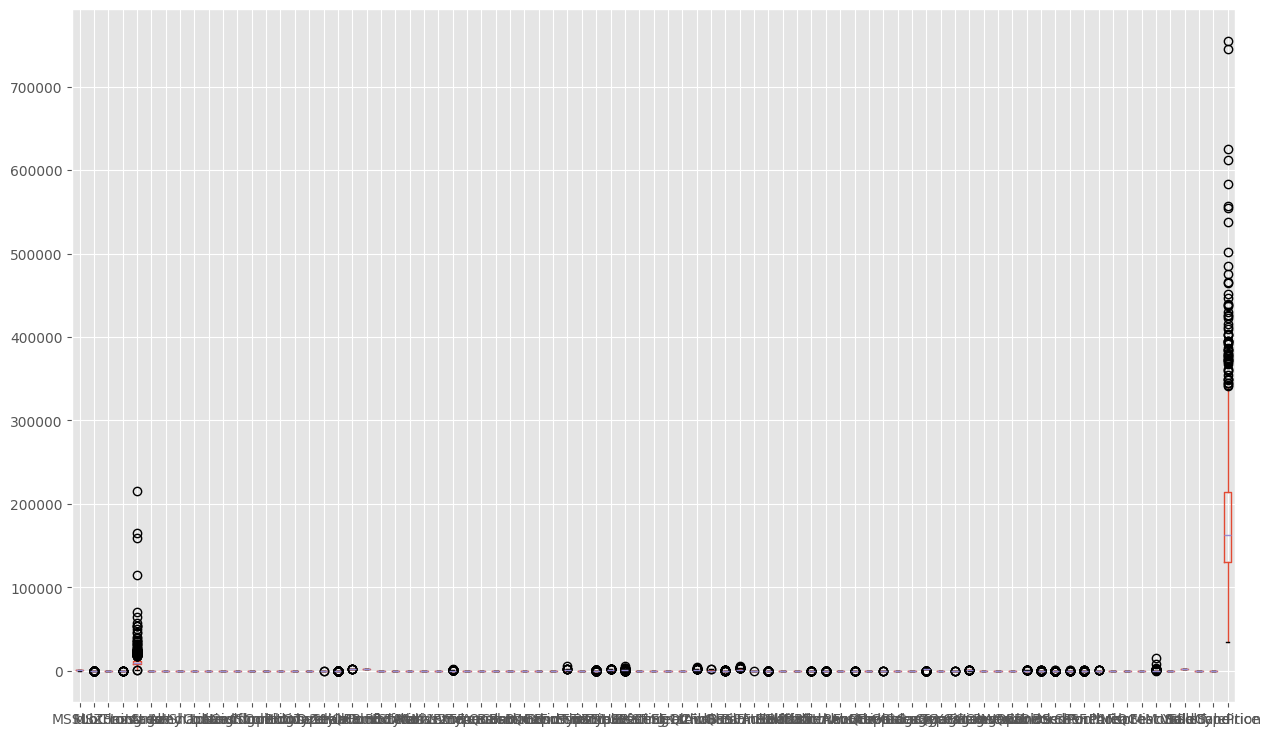

In [6]:
houses_df.boxplot()

In [7]:
houses_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Vemos que tenemos 2 campos con valores atípicos

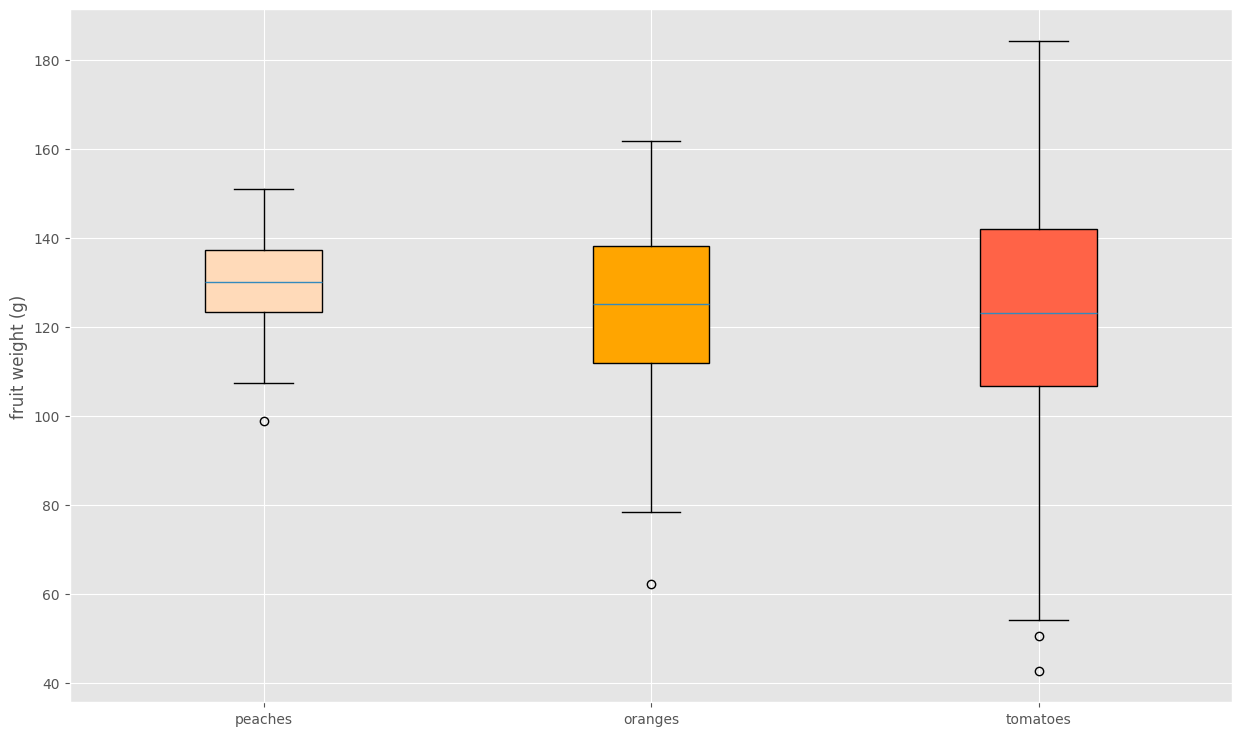

In [8]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
fruit_weights = [
    np.random.normal(130, 10, size=100),
    np.random.normal(125, 20, size=100),
    np.random.normal(120, 30, size=100),
]
labels = ['peaches', 'oranges', 'tomatoes']
colors = ['peachpuff', 'orange', 'tomato']

fig, ax = plt.subplots()
ax.set_ylabel('fruit weight (g)')

bplot = ax.boxplot(fruit_weights,
                   patch_artist=True,  # fill with color
                   tick_labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

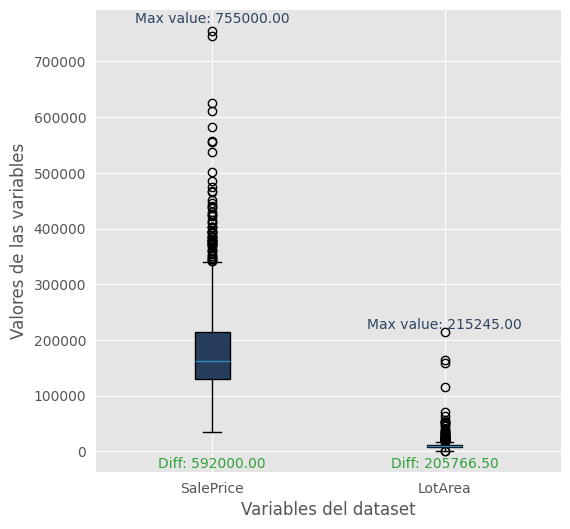

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))

# Create the boxplot
bplot = ax.boxplot(houses_df[["SalePrice", "LotArea"]], patch_artist=True, tick_labels=["SalePrice", "LotArea"])

# Set the title and labels
plt.xlabel("Variables del dataset")
plt.ylabel("Valores de las variables")

# Add text annotations for each column
columns = ["SalePrice", "LotArea"]

colors = ['peachpuff', 'orange', 'tomato', "blue", "green"]

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor("#263D5C")



for i, column in enumerate(columns):
    max_value = houses_df[column].max()
    plt.text(i + 1, - 30000, f'Diff: {(max_value - houses_df[column].median()):.2f}', horizontalalignment='center', color='#32A13A')
    plt.text(i + 1, max_value + (max_value * 0.02), f'Max value: {max_value:.2f}', horizontalalignment='center', color='#2E4462')

# ax.set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(left=False, bottom=False)

# Show the plot
plt.show()

Eliminamos los valores que puedan arruinar nuestras predicciones

In [10]:
houses_df = houses_df[houses_df["SalePrice"] < 700000]
houses_df = houses_df[houses_df["LotArea"] < 100000]

Separamos nuestras variables de las variables objetivo

In [11]:
# Define the target
y = houses_df.pop('SalePrice')

# Remove the target from the current DataFrame
X = houses_df
random.seed(1234)

Hacemos la división de nuestro set de datos

In [12]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

Separamos nuestras variables en categoricas y numéricas

In [13]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses_df)
categorical_columns = categorical_columns_selector(houses_df)

In [14]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standar-scaler', numerical_preprocessor,numerical_columns)
    ])

In [15]:
#param_grid = {"max_depth": np.arange(2, 10, 1)}
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor',GaussianNB())])
#params = [{
#    "regressor__max_depth": np.arange(2, 10, 1)
#}]
pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('one-hot-encoder',
                                    OneHotEncoder(handle_unknown='ignore'), []),
                                   ('standar-scaler', StandardScaler(),
                                    ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage',
                                     'LotArea', 'Street', 'Alley', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'OverallQual', 'OverallCond', 'YearBuilt',
                                     'YearRemodAdd', 'RoofStyle', 'RoofMatl',
                                     'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                     'MasVnrArea', 'ExterQual', 'ExterCond',
                                 

Realizamos la predicción de nuestro modelo

In [16]:
modelo = pipeline.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
rmse = root_mean_squared_error(y_test,y_pred)

In [17]:
minimo = y.min()
print("Valor mínimo: ", minimo)
maximo = y.max()
print("Valor máximo: ", maximo)

std_dev = np.std(y)
print("Desviación estándar: ", std_dev)

print("Valor RMSE: ", rmse)

Valor mínimo:  34900
Valor máximo:  625000
Desviación estándar:  76434.20276151803
Valor RMSE:  51482.35341988443


In [18]:

# Try a different model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Use cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Take the square root and make positive (because cross_val_score returns negative values for MSE)
rmse_scores = np.sqrt(-scores)

print("RMSE Scores:", rmse_scores)
print("RMSE Mean:", rmse_scores.mean())
print("RMSE Standard Deviation:", rmse_scores.std())

RMSE Scores: [23248.31300815 23684.70397322 25590.31914423 39917.9175151
 26750.29405817]
RMSE Mean: 27838.30953977222
RMSE Standard Deviation: 6172.1094401669825


Sacamos la variable categórica del SalePrice

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


/var/folders/wx/3fwd1ycn21q0f_72nz8kjrr00000gn/T/ipykernel_73629/3969318573.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_prices = houses_df.groupby('Precio_Categoria')['SalePrice'].max()
/var/folders/wx/3fwd1ycn21q0f_72nz8kjrr00000gn/T/ipykernel_73629/3969318573.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  min_prices = houses_df.groupby('Precio_Categoria')['SalePrice'].min()


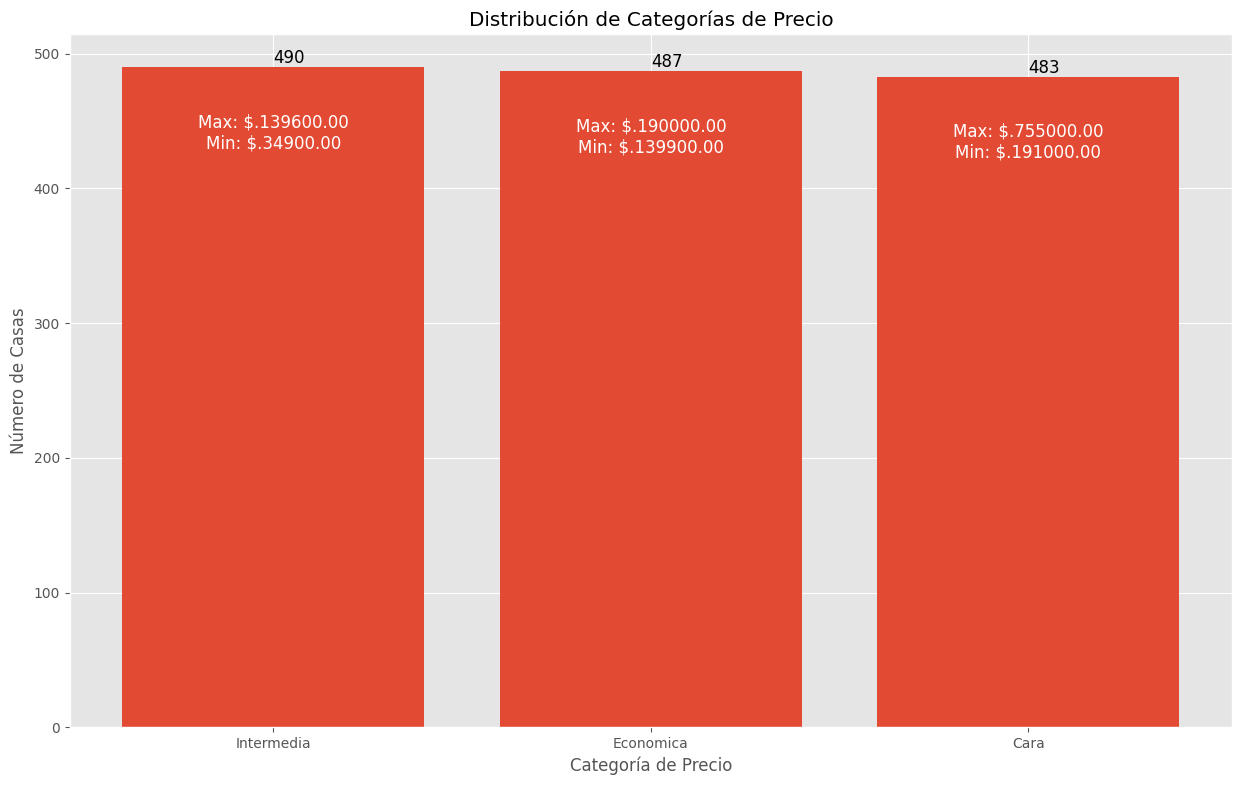

In [19]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

for i in null_counts.index:
    print(i)
    houses_df = houses_df.apply(pd.to_numeric, errors='coerce')
    houses_df = houses_df.fillna(0)

# Define the number of categories
num_categories = 3

# Define the category names
category_names = ['Economica', 'Intermedia', 'Cara']

# Create a new column in the DataFrame for the categories
houses_df['Precio_Categoria'] = pd.qcut(houses_df['SalePrice'], q=num_categories, labels=category_names)

# Obtener la casa más cara y más barata en SalePrice por cada etiqueta en Precio_Categoria
max_prices = houses_df.groupby('Precio_Categoria')['SalePrice'].max()
min_prices = houses_df.groupby('Precio_Categoria')['SalePrice'].min()

# Verificar la distribución de las categorías
bars = plt.bar(houses_df['Precio_Categoria'].value_counts().index, houses_df['Precio_Categoria'].value_counts().values)
for index, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', fontsize=12)  # va='bottom' para colocar el texto justo encima de la barra
    category = bar.get_x() + bar.get_width()/2
    max_price = max_prices[category_names[index]]
    min_price = min_prices[category_names[index]]
    plt.text(bar.get_x() + bar.get_width()/2, yval - yval*0.1, f'Max: $.{int(max_price)}.00\nMin: $.{int(min_price)}.00', ha='center', va='center', fontsize=12, color='white')

plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Casas')
plt.title('Distribución de Categorías de Precio')
plt.show()

/var/folders/wx/3fwd1ycn21q0f_72nz8kjrr00000gn/T/ipykernel_73629/614646375.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_prices = houses_df.groupby('Precio_Categoria')['SalePrice'].max()
/var/folders/wx/3fwd1ycn21q0f_72nz8kjrr00000gn/T/ipykernel_73629/614646375.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  min_prices = houses_df.groupby('Precio_Categoria')['SalePrice'].min()
/var/folders/wx/3fwd1ycn21q0f_72nz8kjrr00000gn/T/ipykernel_73629/614646375.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as la

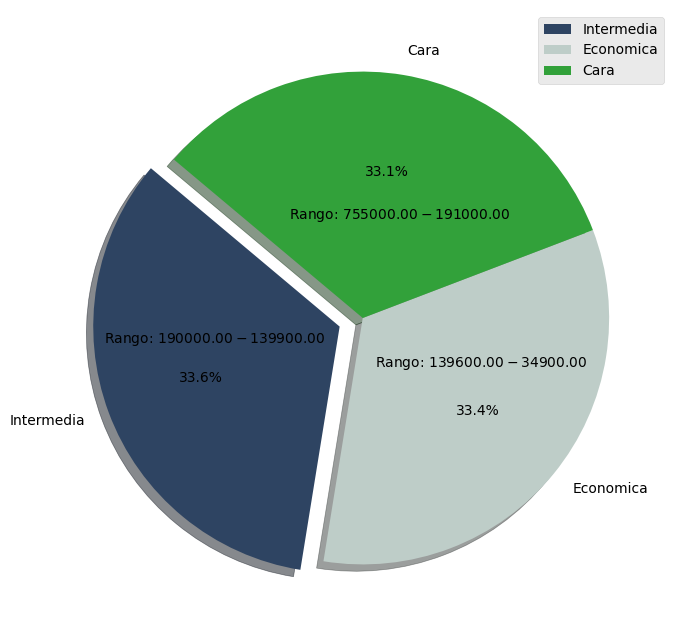

In [46]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

for i in null_counts.index:
    houses_df = houses_df.apply(pd.to_numeric, errors='coerce')
    houses_df = houses_df.fillna(0)

# Define the number of categories
num_categories = 3

# Define the category names
category_names = ['Economica', 'Intermedia', 'Cara']

# Create a new column in the DataFrame for the categories
houses_df['Precio_Categoria'] = pd.qcut(houses_df['SalePrice'], q=num_categories, labels=category_names)

# Obtener la casa más cara y más barata en SalePrice por cada etiqueta en Precio_Categoria
max_prices = houses_df.groupby('Precio_Categoria')['SalePrice'].max()
min_prices = houses_df.groupby('Precio_Categoria')['SalePrice'].min()

# Calculate the value counts for each category
category_counts = houses_df['Precio_Categoria'].value_counts()

# Define the colors for the pie chart
colors = ['#2E4462','#BECDC8','#32A13A']

# Define the explode values to highlight specific slices
explode = (0.1, 0, 0)  # Explode the first slice

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)

# Add text annotations for each category
plt.text(0.05, -0.2, f'Rango: ${int(max_prices[0])}.00 - ${int(min_prices[0])}.00', color='black', fontsize=10)
plt.text(-1.05, -0.1, f'Rango: ${int(max_prices[1])}.00 - ${int(min_prices[1])}.00', color='black', fontsize=10)
plt.text(-0.3, 0.4, f'Rango: ${int(max_prices[2])}.00 - ${int(min_prices[2])}.00', color='black', fontsize=10)

# Add a legend
plt.legend(category_counts.index, loc="best")

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Codificar la variable categórica
le = LabelEncoder()
houses_df['Precio_Categoria'] = le.fit_transform(houses_df['Precio_Categoria'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(houses_df.drop('Precio_Categoria', axis=1), houses_df['Precio_Categoria'], test_size=0.2, random_state=42)

# Crear y ajustar el modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00        88

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



Convertimos los valores de la variable categórica en valores numéricos

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Precio_Categoria' column
houses_df['Precio_Categoria'] = le.fit_transform(houses_df['Precio_Categoria'])

houses_df['Precio_Categoria']

0       0
1       2
2       0
3       2
4       0
       ..
1455    2
1456    0
1457    0
1458    2
1459    2
Name: Precio_Categoria, Length: 1460, dtype: int64

Validación cruzada

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

X = houses_df.drop(['Precio_Categoria'], axis=1)

# Crear las etiquetas para cada modelo
y1 = houses_df['Precio_Categoria']

# Crear los modelos
model1 = LinearRegression()

# Realizar la validación cruzada 
scores1 = cross_val_score(model1, X, y1, cv=5, scoring='neg_mean_squared_error')

# Tomar la raíz cuadrada y hacer positivo (porque cross_val_score devuelve valores negativos para MSE)
rmse_scores1 = np.sqrt(-scores1)

# Imprimir los valores de RMSE
print("Validación Cruzada")
print("RMSE Scores for Precio_Categoria:", rmse_scores1)
print("RMSE Mean for Precio_Categoria:", rmse_scores1.mean())
print("RMSE Standard Deviation for Precio_Categoria:", rmse_scores1.std())

Validación Cruzada
RMSE Scores for Precio_Categoria: [0.67120916 0.66027562 0.68067049 0.67760648 0.69307366]
RMSE Mean for Precio_Categoria: 0.6765670790744973
RMSE Standard Deviation for Precio_Categoria: 0.010812072028990139


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

X = houses_df.drop(['SalePrice'], axis=1)

# Crear las etiquetas para cada modelo
y2 = houses_df['SalePrice']

# Crear los modelos
model2 = LinearRegression()

# Realizar la validación cruzada 
scores2 = cross_val_score(model2, X, y2, cv=5, scoring='neg_mean_squared_error')

# Tomar la raíz cuadrada y hacer positivo (porque cross_val_score devuelve valores negativos para MSE)
rmse_scores2 = np.sqrt(-scores2)

# Imprimir los valores de RMSE
print("Validación Cruzada")
print("RMSE Scores for SalePrice:", rmse_scores2)
print("RMSE Mean for SalePrice:", rmse_scores2.mean())
print("RMSE Standard Deviation for SalePrice:", rmse_scores2.std())

Validación Cruzada
RMSE Scores for SalePrice: [27852.15120211 32992.62911514 35784.34524141 28644.09008407
 46463.41736539]
RMSE Mean for SalePrice: 34347.32660162411
RMSE Standard Deviation for SalePrice: 6714.374036233998


In [ ]:
# Define the target
y = houses_df.pop('Precio_Categoria')

# Remove the target from the current DataFrame
X = houses_df
random.seed(1234)

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

Confusion matrix for Naive Bayes
 [[120   2  12]
 [  4 139  10]
 [  9  54  88]]
Accuracy:  0.7922374429223744


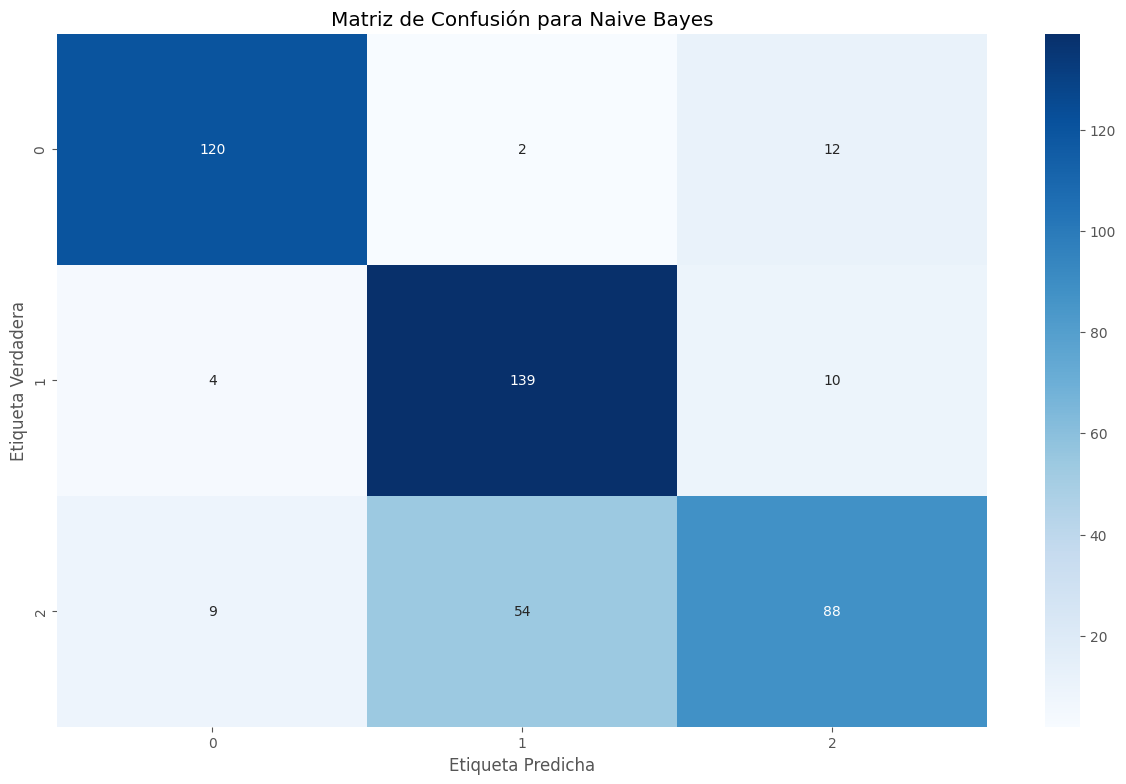

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('Accuracy: ',accuracy)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Matriz de Confusión para Naive Bayes')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

Realizamos cross validation de los datos para tunear nuestra predicción

In [ ]:
params =  [{
    "regressor__var_smoothing": np.logspace(0,-9, num=100)
}]
modelo = GridSearchCV(pipeline,param_grid=params,n_jobs=2, cv=5,scoring="neg_root_mean_squared_error")
modelo.fit(X_train,y_train)
modelo.best_params_

{'regressor__var_smoothing': 0.0657933224657568}

In [ ]:
print(modelo.best_estimator_)
print('best score:')
print(modelo.best_score_)
y_mejor_pred = modelo.best_estimator_.predict(X_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standar-scaler',
                                                  StandardScaler(),
                                                  ['Id', 'MSSubClass',
                                                   'MSZoning', 'LotFrontage',
                                                   'LotArea', 'Street', 'Alley',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyl

In [ ]:
minimo = y.min()
print("Valor mínimo: ", minimo)
maximo = y.max()
print("Valor máximo: ", maximo)

std_dev = np.std(y)
print("Desviación estándar: ", std_dev)

rmse_tunned = root_mean_squared_error(y_test,y_mejor_pred)
print("Valor RMSE: ", rmse_tunned)

Valor mínimo:  0
Valor máximo:  2
Desviación estándar:  0.8163426784978834
Valor RMSE:  0.7087193415046826


Eficiencia del modelo

In [ ]:
modelo = pipeline.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
rmse = root_mean_squared_error(y_test,y_pred)


In [ ]:
minimo = y.min()
print("Valor mínimo: ", minimo)
maximo = y.max()
print("Valor máximo: ", maximo)

std_dev = np.std(y)
print("Desviación estándar: ", std_dev)

print("Valor RMSE: ", rmse)

Valor mínimo:  0
Valor máximo:  2
Desviación estándar:  0.8163426784978834
Valor RMSE:  0.7309217299700876
